### Preprocess

preprocess the screenshot files in the img/ directory to separate the front camera view,
as well as the left and right side mirror views.

the csv file is also modified to represent the preprocessed images.

let's open the csv file

In [63]:
%ls ../data

f75431de.csv  img/


In [64]:
import pandas as pd

In [66]:
df = pd.read_csv('../data/f75431de.csv', header=0)
df.head(3)

,id,img,wheel-axis,clutch,brake,gas,paddle-left,paddle-right,wheel-button-left-1,wheel-button-left-2,...,shifter-button-2,shifter-button-3,shifter-button-4,gear-1,gear-2,gear-3,gear-4,gear-5,gear-6,gear-R
0,0,data/img/raw/f75431de_2017_07_26_20_08_06_51.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,data/img/raw/f75431de_2017_07_26_20_08_06_60.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,data/img/raw/f75431de_2017_07_26_20_08_06_66.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


open one of the image files

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

image size is (1024, 768)


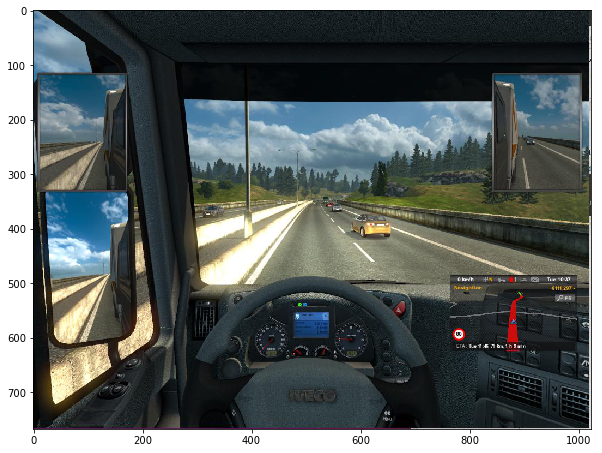

In [75]:
img_path = '../' + df['img'][0]
img = Image.open(img_path)
print("image size is %s" % (img.size,))

fig = plt.figure(figsize = (10,10))
plt.imshow(img)

As shown above, the screenshot from Euro Truck Simulator(ETS) has several information, such as
the route advisor showing the map, two side mirrors, the car dashboard, and the front view.

Let's divide the screenshot image such that there are three "cameras", each of which is facing the front, left side, and right side.

In [92]:
# define coordinates
front_coord = (289,167, 851, 508)
left_coord = (13, 119, 171, 331)
right_coord = (846, 118, 1004, 330)

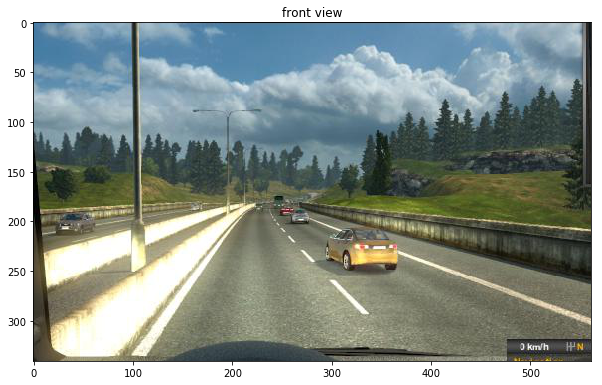

In [112]:
img_front = img.crop(front_coord)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title='front view')
ax.imshow(img_front)

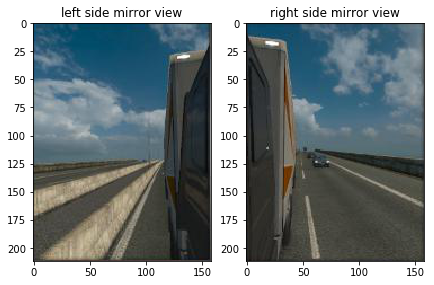

In [116]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(7,7))
ax0.set(title='left side mirror view')
ax0.imshow(img_left)
ax1.set(title='right side mirror view')
ax1.imshow(img_right)

TODO: Save the image to directory, and add